In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

train=pd.read_csv('/Users/dyy/Desktop/train.csv')
test=pd.read_csv('/Users/dyy/Desktop/test.csv')
name=train.Name
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#data cleaning
#numerical character: age, fare, sibsp, parch
#categoral character: sex, embarked, survived, Pclass
#including numerical and object character: Pclass and fare
#word: Name

In [6]:
#get the situation of missing and shape
train.shape

(891, 12)

In [7]:
train.isnull().sum()
#'Age' missed 20%, then deal with filling;
#'Cabin' missed 77%, then delete
#'Embarked' only 2 missing data, delete or fill in

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#For 'Age', deal it depend on the data distribution
#most of the time, the average larger than medium
#and via desvribe() we can see that average slightly larger than medium
#then we can fill in with medium or average
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
import sklearn

sklearn.__version__

'1.0.2'

In [37]:
from sklearn.impute import SimpleImputer

Imp=SimpleImputer(missing_values=np.nan,strategy='median')
new=Imp.fit_transform(train.Age.values.reshape(1,-1))
train['Age2']=new.T
train.drop('Age', axis=1, inplace=True)

ValueError: Length of values (714) does not match length of index (891)

In [38]:
#delete some indices which has limited influence or missing data
train.drop(['Ticket','Cabin','Name'],axis=1,inplace=True)
train.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
888          889         0       3  female   NaN      1      2  23.4500   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3        

In [40]:
#delete missing data of 'Embarked'
train.isnull().sum()
train.dropna(inplace=True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [41]:
#one-hot encoding of data
#1.convert categorical variable into dummy/indicator variables
train.set_index('PassengerId',inplace=True)
train=pd.get_dummies(train, columns=['Sex'],drop_first=True)
train=pd.get_dummies(train, columns=['Embarked'],drop_first=True)

In [42]:
train.head

<bound method NDFrame.head of              Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
PassengerId                                                            
1                   0       3  22.0      1      0   7.2500         1   
2                   1       1  38.0      1      0  71.2833         0   
3                   1       3  26.0      0      0   7.9250         0   
4                   1       1  35.0      1      0  53.1000         0   
5                   0       3  35.0      0      0   8.0500         1   
...               ...     ...   ...    ...    ...      ...       ...   
886                 0       3  39.0      0      5  29.1250         0   
887                 0       2  27.0      0      0  13.0000         1   
888                 1       1  19.0      0      0  30.0000         0   
890                 1       1  26.0      0      0  30.0000         1   
891                 0       3  32.0      0      0   7.7500         1   

             Embarked_Q  Embarked

In [46]:
#Binning Data for numerical data, it is convenient for machine learning and statistical analysis
#FOR 'Fare'

train['Fare']=train['Fare'].astype(int)

train.loc[train.Fare<=7.91,'Fare']=0
train.loc[(train.Fare>7.91)&(train.Fare<=14.454),'Fare']=1
train.loc[(train.Fare>14.454)&(train.Fare<=31),'Fare']=2
train. loc [(train. Fare>31), 'Fare']=3

In [47]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,0,1,0,1
2,1,1,38.0,1,0,3,0,0,0
3,1,3,26.0,0,0,0,0,0,1
4,1,1,35.0,1,0,3,0,0,1
5,0,3,35.0,0,0,0,1,0,1


In [48]:
#FOR 'Age'
train['Age']=train['Age'].astype(int)

train.loc[train.Age<=16,'Age']=0
train.loc[(train.Age>16)&(train.Age<=32),'Age']=1
train.loc[(train.Age>32)&(train.Age<=48),'Age']=2
train.loc[(train.Age>49)&(train.Age<=64),'Age']=3
train. loc [(train. Age>64), 'Age']=4

In [49]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,1,0,0,1,0,1
2,1,1,2,1,0,3,0,0,0
3,1,3,1,0,0,0,0,0,1
4,1,1,2,1,0,3,0,0,1
5,0,3,2,0,0,0,1,0,1


In [50]:
#survival rate

#because 'Survived' only contain '0' and '1', the average is survival rate
#and it is the reason that binary classification always uses 0 and 1

train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,1.744382,0.514045,0.432584,1.273876,0.636236,0.039326,0.778090
std,0.491139,0.836854,4.447139,0.930692,0.854181,1.300002,0.481420,0.194506,0.415823
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,49.000000,5.000000,6.000000,3.000000,1.000000,1.000000,1.000000


In [51]:
#relationship between 'sex' and 'survival rate'

train.groupby('Sex_male').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Sex_male,,,,,,,,
0,0.752896,2.073359,1.598456,0.644788,0.714286,1.664093,0.046332,0.718147
1,0.205298,2.335541,1.827815,0.439294,0.271523,1.050773,0.035320,0.812362


In [52]:
# correlation(use correlation matrix and heatmap)

train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.356462,0.031951,-0.015523,0.095265,0.304263,-0.536762,-0.048966,-0.159015
Pclass,-0.356462,1.000000,-0.168284,0.065187,0.023666,-0.656534,0.150826,0.131989,0.197831
Age,0.031951,-0.168284,1.000000,-0.043647,-0.060451,0.089003,0.024829,-0.024134,-0.098409
SibSp,-0.015523,0.065187,-0.043647,1.000000,0.383338,0.386824,-0.106296,0.051331,0.018968
Parch,0.095265,0.023666,-0.060451,0.383338,1.000000,0.373196,-0.249543,-0.009417,0.013259
Fare,0.304263,-0.656534,0.089003,0.386824,0.373196,1.000000,-0.227126,-0.087153,-0.197030
Sex_male,-0.536762,0.150826,0.024829,-0.106296,-0.249543,-0.227126,1.000000,-0.027256,0.109078
Embarked_Q,-0.048966,0.131989,-0.024134,0.051331,-0.009417,-0.087153,-0.027256,1.000000,-0.378859
Embarked_S,-0.159015,0.197831,-0.098409,0.018968,0.013259,-0.197030,0.109078,-0.378859,1.000000


Text(0.5, 1.0, 'Correlations Among Features')

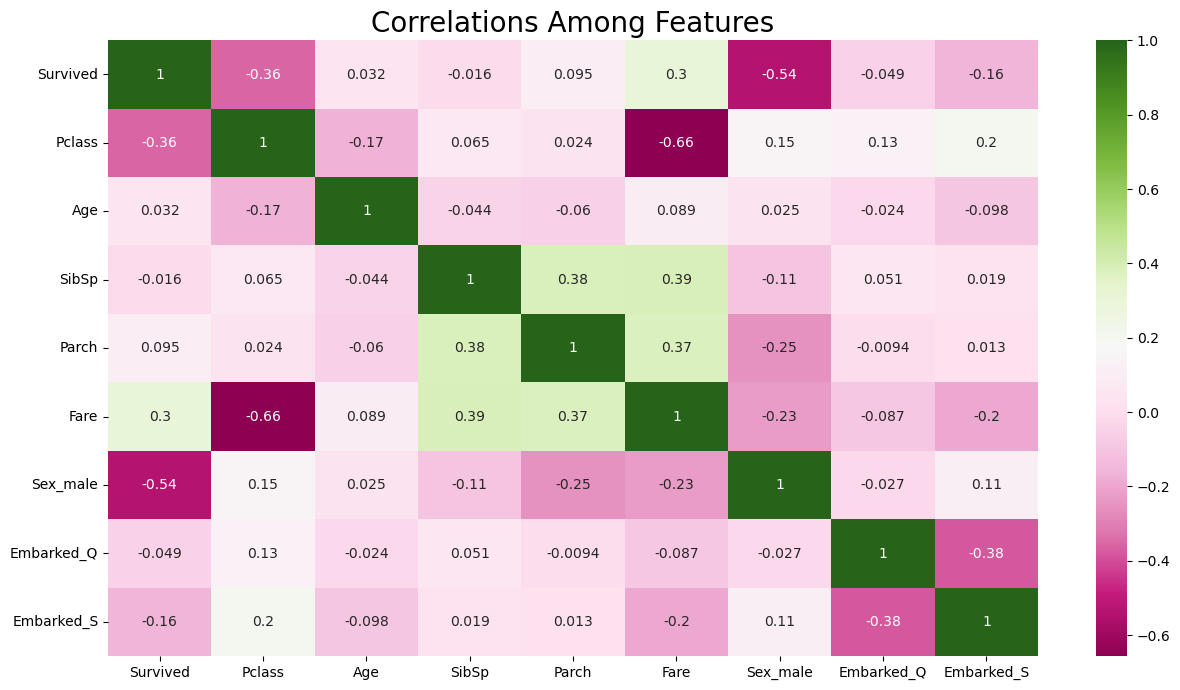

In [53]:
plt.subplots(figsize=(15,8))
sns.heatmap(train.corr(),annot=True,cmap='PiYG')
plt.title('Correlations Among Features',fontsize=20)

([<matplotlib.axis.XTick at 0x7fb90cf0fe50>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

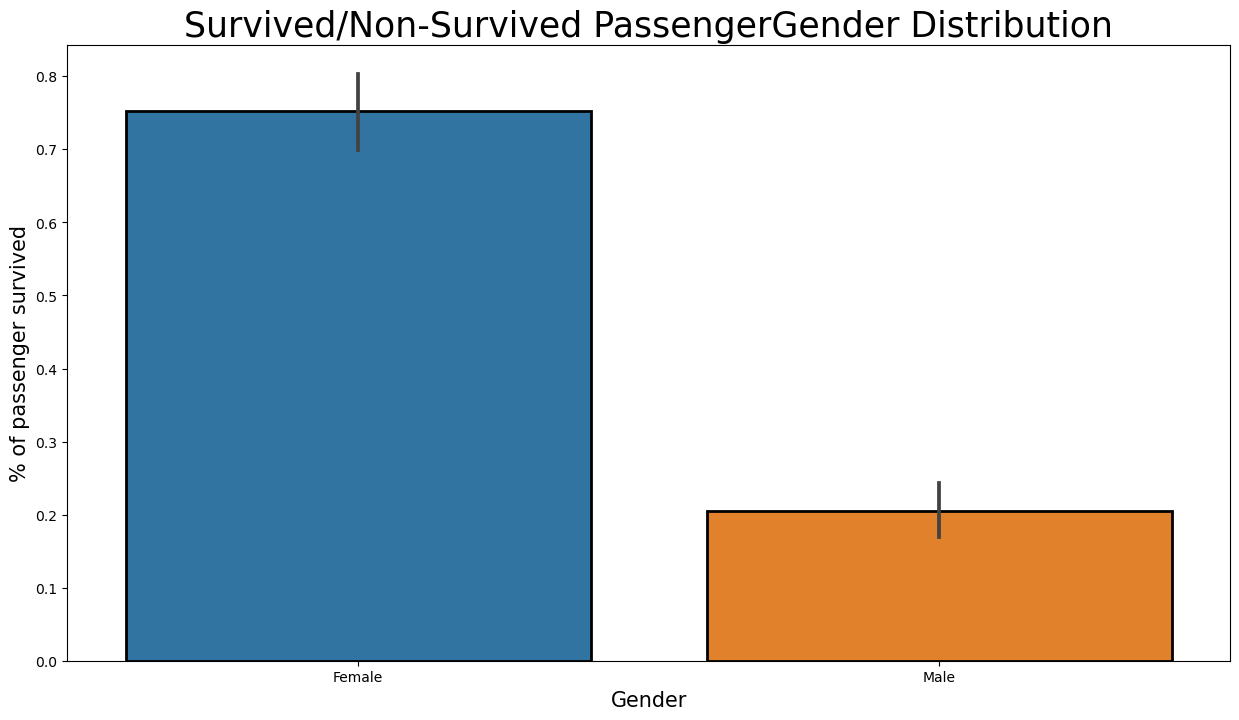

In [57]:
#the relationship between indices and survival
#For 'Sex'

plt.subplots(figsize=(15,8))
sns.barplot(x='Sex_male',y='Survived',data=train,edgecolor=(0,0,0),linewidth=2)
plt.title("Survived/Non-Survived PassengerGender Distribution",fontsize=25)
labels=['Female','Male']
plt.ylabel("% of passenger survived", fontsize=15)
plt.xlabel("Gender",fontsize=15)
plt.xticks(sorted(train.Sex_male.unique()),labels)

([<matplotlib.axis.XTick at 0x7fb90daef610>,
 [Text(1, 0, 'First'), Text(2, 0, 'Second'), Text(3, 0, 'Third')])

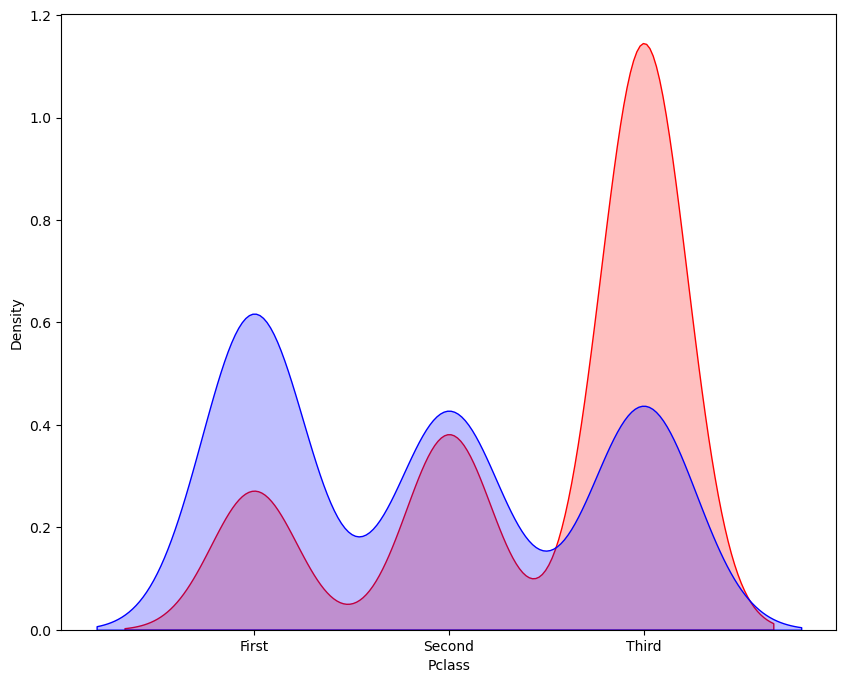

In [67]:
#the relationship between indices and survival
#For 'Pclass'

plt. subplots (figsize= (10, 8)) 
sns. kdeplot (train.loc[(train['Survived'] == 0), 'Pclass'],shade=True,color='r',label='Not Survived')
ax=sns. kdeplot (train. loc [ (train ['Survived'] == 1), 'Pclass' ], shade=True, color='b', label='Survived' )

labels=['First','Second','Third' ]
plt.xticks(sorted(train.Pclass.unique()),labels)

#third class died most, and first class least

Text(0.5, 0, 'Fare')

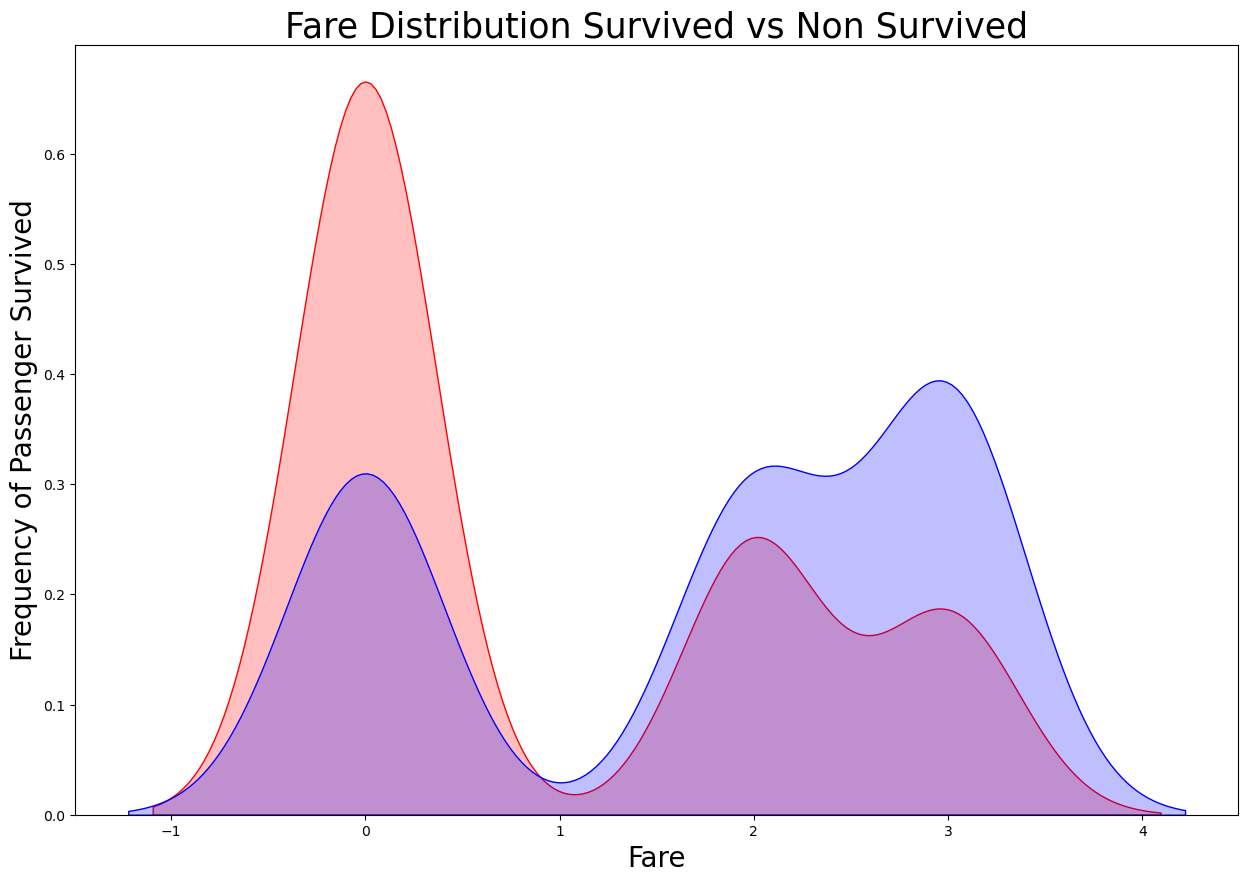

In [71]:
#the relationship between indices and survival
#For 'Fare'

plt. subplots (figsize= (15, 10)) 
sns. kdeplot (train.loc[(train['Survived'] == 0), 'Fare'],shade=True,color='r',label='Not Survived')
ax=sns. kdeplot (train. loc [ (train ['Survived'] == 1), 'Fare' ], shade=True, color='b', label='Survived' )

plt.title ('Fare Distribution Survived vs Non Survived', fontsize=25)
plt.ylabel ('Frequency of Passenger Survived', fontsize=20)
plt.xlabel('Fare',fontsize=20)

#higher fare led to higher survival probability

<AxesSubplot:xlabel='Age', ylabel='Density'>

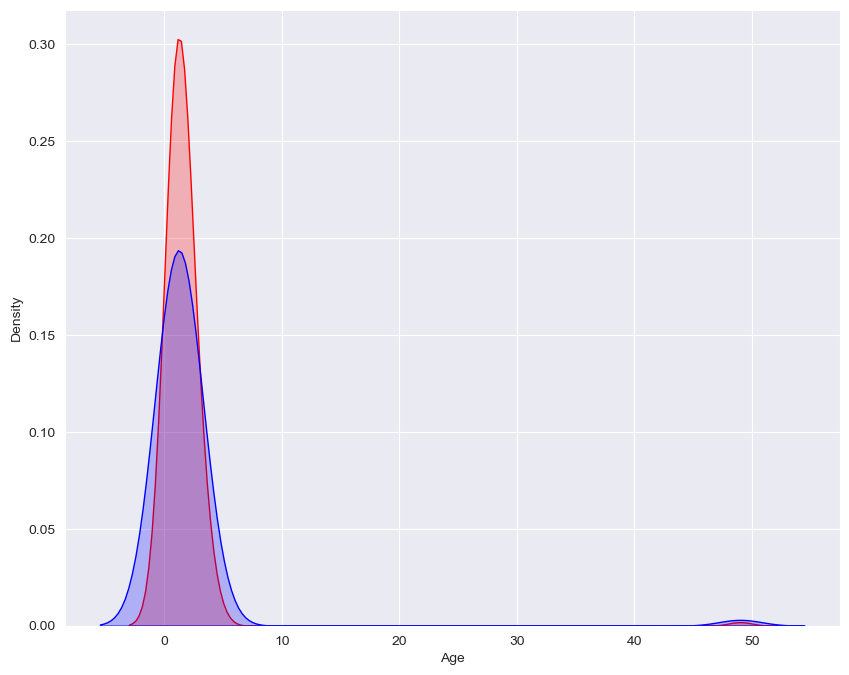

In [77]:
#the relationship between indices and survival
#For 'Age'

fig,axs=plt.subplots (figsize= (10, 8))
sns.set_style (style='darkgrid')
sns.kdeplot (train. loc [(train['Survived']==0),'Age'],color='r',shade=True, label='Not Survived')
sns.kdeplot (train. loc [(train ['Survived']==1),'Age'],color='b', shade=True, label=' Survived')

#The age of death is concentrated in 16-32 years old. 
#In this age range, the death rate of personnel is higher than the survival rate. 
#The death rate of people over 65 years old is higher than the survival rate
#but the survival rate of people under 16 years old is significantly higher than the death rate.

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn. svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

In [90]:
#Import common classification models
#build classifiers, place various models, and compare model accuracy

classifiers = [ 
    KNeighborsClassifier (3), 
    SVC (probability=True),
    DecisionTreeClassifier (),
    XGBClassifier (),
    RandomForestClassifier(n_estimators=100,max_features=3), 
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB (),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

In [91]:
#Create a scoring basis, score with accuracy
#create an empty dataframe containing classifiers and accuracy scores
#import the scoring module and data segmentation module
#create an empty dictionary to store the results of each classifier
#and finally train the model and predict

log_cols=["Classifier","Accuracy"]
log=pd.DataFrame(columns=log_cols)

In [92]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [93]:
sss=StratifiedShuffleSplit(n_splits=10, test_size=0.3,random_state=0)

In [94]:
acc_dict={}

In [95]:
X=train.drop('Survived',axis=1)
y=train['Survived'].astype(int)

In [100]:
for train_index, test_index in sss.split(X,y):
    
    X_train, X_test= X.iloc[train_index],X.iloc[test.index]
    y_train, y_test= y.iloc[train_index],y.iloc[test.index]
    
    for clf in classifiers:
        name=clf.__class__.__name__
        
        clf.fit(X_train,y_train)
        predict=clf.predict(X_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc

/Users/dyy/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/dyy/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

In [98]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()

In [99]:
log
#Found that RandomForestClassifier is the best, then used it to predict

,Classifier,Accuracy
0,KNeighborsClassifier,8.083732
1,SVC,7.952153
2,DecisionTreeClassifier,8.488038
3,XGBClassifier,8.531100
4,RandomForestClassifier,8.555024
5,AdaBoostClassifier,7.901914
6,GradientBoostingClassifier,8.392344
7,GaussianNB,7.389952
8,LinearDiscriminantAnalysis,7.775120
9,QuadraticDiscriminantAnalysis,7.566986


In [101]:
classifier=RandomForestClassifier(n_estimators=100,max_features=3)
xtrain=train.iloc[:,1:]
ytrain=train.iloc[:,:1]
ytrain=ytrain.values.ravel()
classifier.fit(xtrain,ytrain)

RandomForestClassifier(max_features=3)

In [102]:
#preprocess 'test' data in the same way
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
Result=classifier.predict(test)
print(Result)